# KNN ASSIGNMENT

# 1)Prepare a model for glass classification using KNN

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
glass=pd.read_csv("glass.csv")

In [3]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


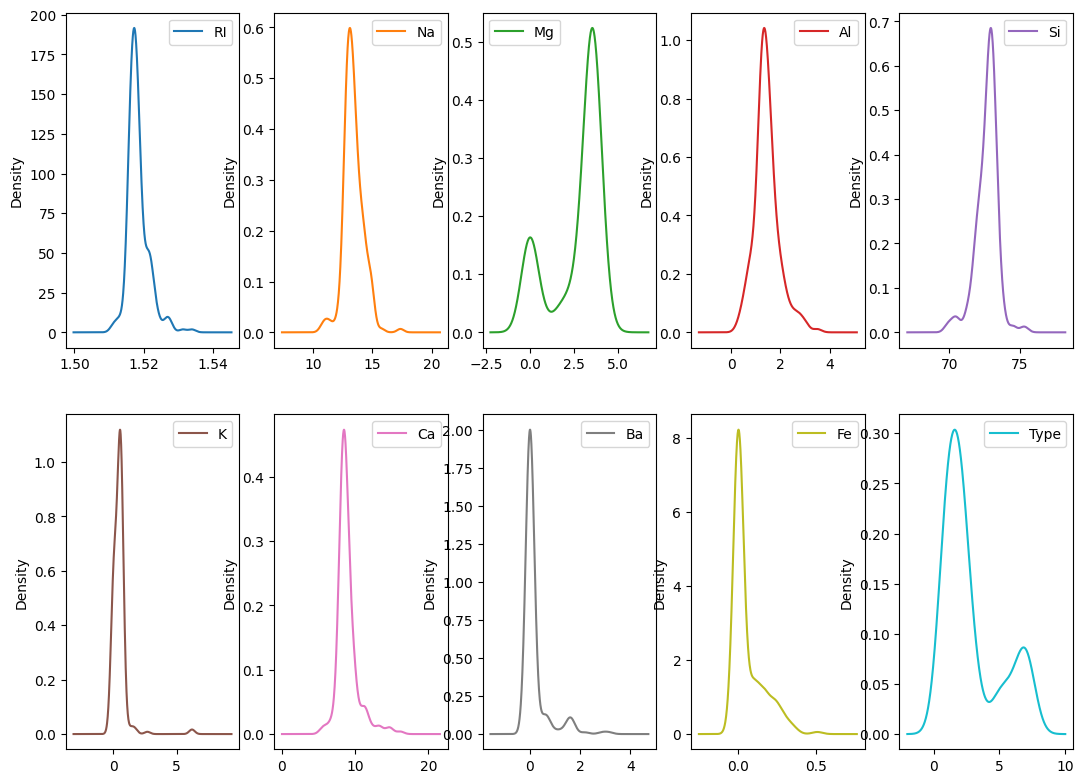

In [8]:
glass.plot(kind='density', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
plt.show()

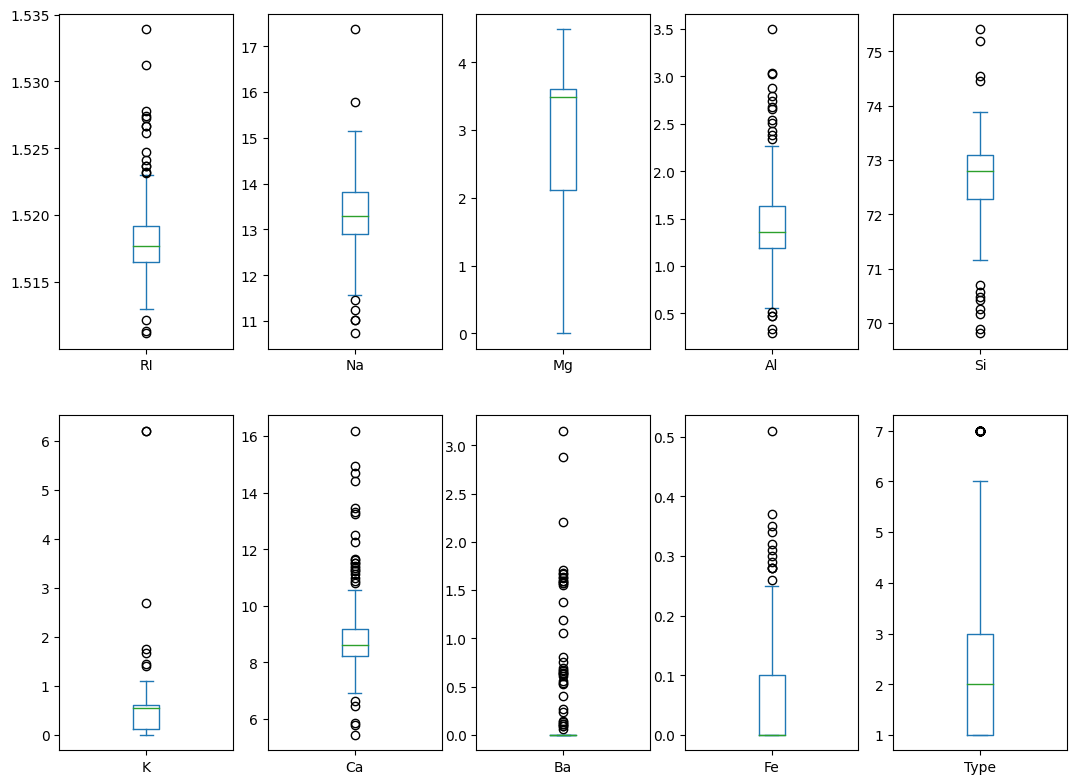

In [9]:
glass.plot(kind='box', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
plt.show()

In [11]:
cor = glass.corr(method='pearson')
cor.style.background_gradient(cmap='coolwarm')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


As seen in the above graph, there is a high correlation exists between some of the variables. We can use PCA to reduce the hight correlated variables

# PREPARING MODEL

In [4]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [5]:
num_folds= 10
kfold = KFold(n_splits=10)

X = glass.iloc[:,0:9].values
Y = glass.iloc[:,-1]

In [6]:
X
Y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [7]:
model = KNeighborsClassifier(n_neighbors = 5)
model_result = cross_val_score(model,X,Y, cv=kfold)

In [8]:
model_result

array([0.5       , 0.81818182, 0.54545455, 0.90909091, 0.28571429,
       0.57142857, 0.52380952, 0.        , 0.19047619, 0.9047619 ])

In [9]:
model.fit(X,Y)

KNeighborsClassifier()

In [10]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)
n_neighbors
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39])}

In [11]:
from sklearn.model_selection import GridSearchCV
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [12]:
print(grid.best_score_)
print(grid.best_params_)

0.640531561461794
{'n_neighbors': 1}


In [13]:
error = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    pred_i = cross_val_score(model,X,Y, cv=kfold, scoring='accuracy')
    error.append(pred_i.mean())
# k_scores=grid.best_score_
pd.Series(error).sort_values(ascending=False)

0     0.524892
29    0.524892
22    0.524892
23    0.524892
24    0.524892
25    0.524892
26    0.524892
27    0.524892
28    0.524892
30    0.524892
20    0.524892
31    0.524892
32    0.524892
33    0.524892
34    0.524892
35    0.524892
36    0.524892
37    0.524892
21    0.524892
19    0.524892
1     0.524892
9     0.524892
2     0.524892
3     0.524892
4     0.524892
5     0.524892
6     0.524892
7     0.524892
8     0.524892
10    0.524892
18    0.524892
11    0.524892
12    0.524892
13    0.524892
14    0.524892
15    0.524892
16    0.524892
17    0.524892
38    0.524892
dtype: float64

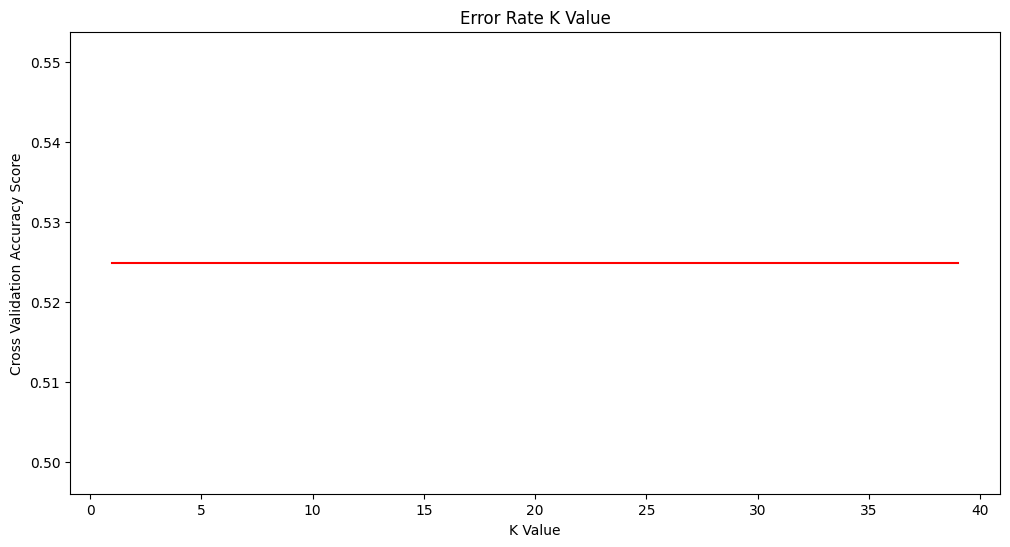

In [14]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error, color='red')
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Cross Validation Accuracy Score')
plt.show()

# 2) Implement a KNN model to classify the animals in to categorie

In [12]:
zoo=pd.read_csv("Zoo.csv")

In [13]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [15]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


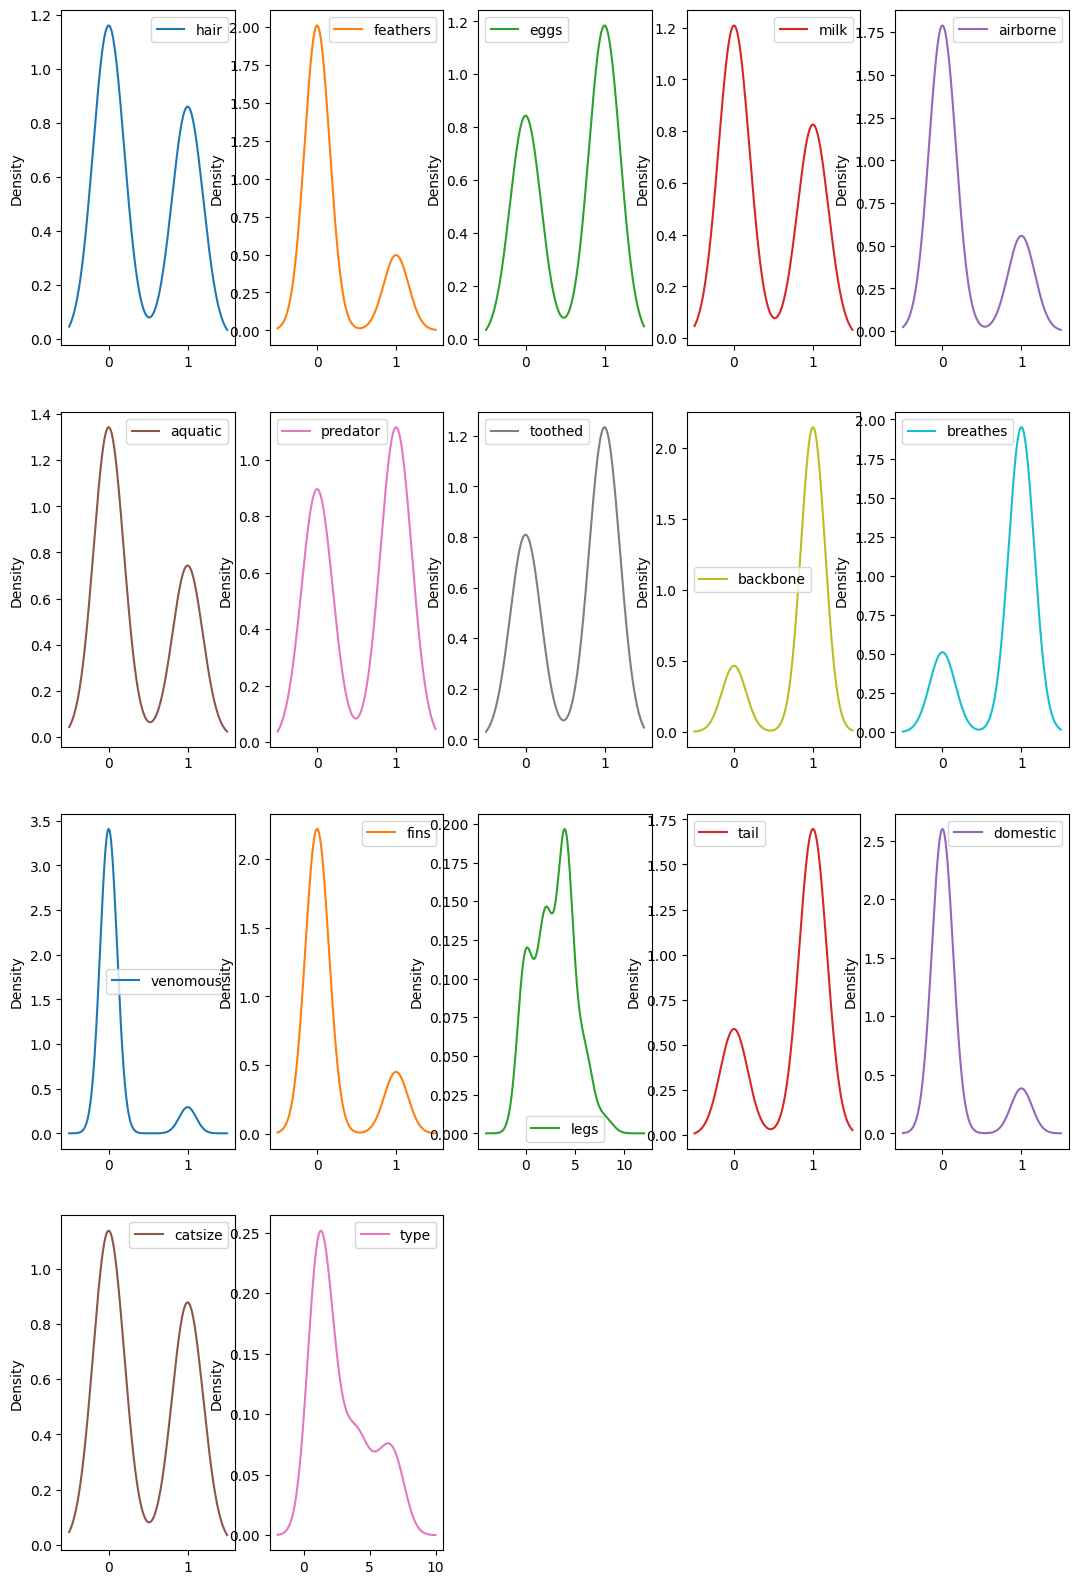

In [16]:
zoo.plot(kind='density', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
plt.show()

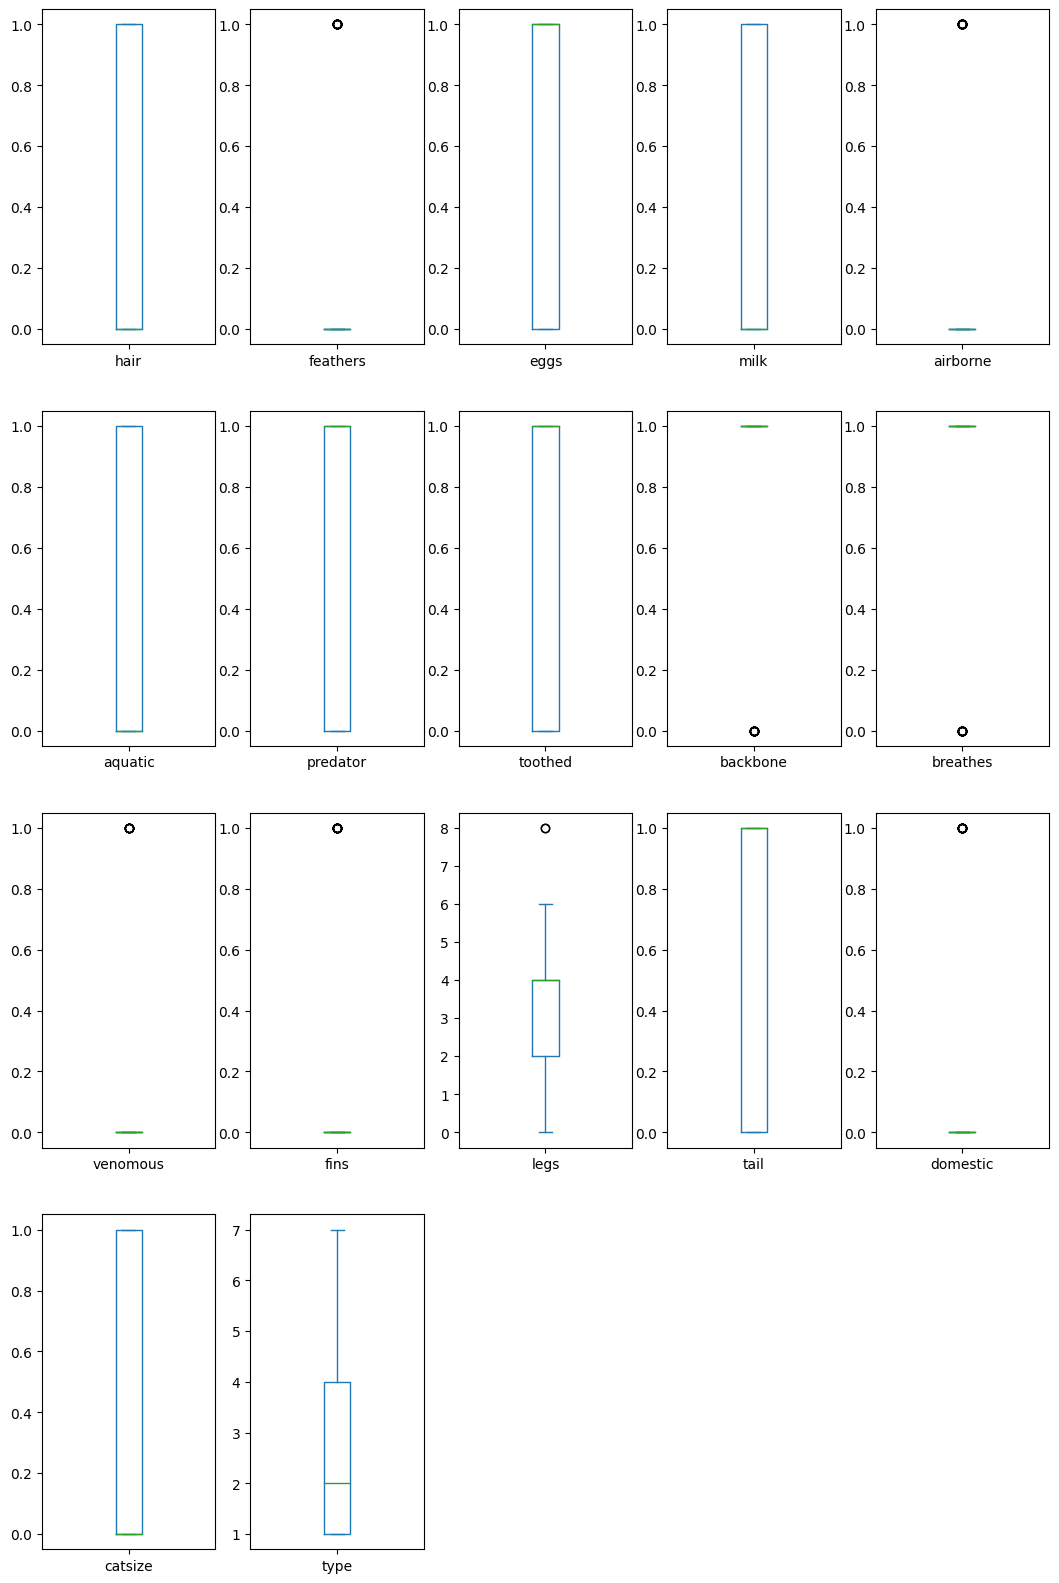

In [17]:
zoo.plot(kind='box', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
plt.show()

As shown in the graphs above, majority of the variables are evenly distributed amongst the animals. However some of the variables like airbone, backbone, breathes, venomous, fins, tail and domestic is not evenly distributed (i.e majority of animals either have these variable or dont)

In [19]:
cor = zoo.corr(method='pearson')
cor.style.background_gradient(cmap='coolwarm')

C:\Users\naveenkumar\AppData\Local\Temp\ipykernel_9136\3563517859.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = zoo.corr(method='pearson')


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


As seen in the above graph, there is a high correlation exists between some of the variables. We can use PCA to reduce the hight correlated variables

In [20]:
x = zoo.iloc[:,1:17].values
y = zoo.iloc[:,-1]

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=30, random_state=0)

In [23]:
print(x_train,x_test)

[[0 0 1 ... 1 0 1]
 [0 0 1 ... 1 0 0]
 [0 0 1 ... 1 0 0]
 ...
 [1 0 0 ... 1 0 1]
 [1 0 0 ... 1 0 1]
 [1 0 0 ... 1 0 1]] [[0 0 1 0 0 1 1 1 1 1 1 0 4 0 0 0]
 [0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1]
 [0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0]
 [1 0 0 1 0 0 0 1 1 1 0 0 4 1 0 1]
 [1 0 0 1 0 1 1 1 1 1 0 1 2 1 0 1]
 [1 0 0 1 0 0 0 1 1 1 0 0 4 1 0 0]
 [0 1 1 0 1 0 1 0 1 1 0 0 2 1 0 0]
 [0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0]
 [1 0 0 1 0 0 1 1 1 1 0 0 4 1 0 0]
 [1 0 0 1 0 0 0 1 1 1 0 0 2 1 0 1]
 [0 0 1 0 0 1 1 0 0 0 0 0 8 0 0 1]
 [1 0 0 1 1 0 0 1 1 1 0 0 2 1 0 0]
 [0 1 1 0 1 1 1 0 1 1 0 0 2 1 0 0]
 [0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0]
 [0 0 1 0 1 0 0 0 0 1 0 0 6 0 0 0]
 [1 0 0 1 0 0 0 1 1 1 0 0 4 1 0 1]
 [0 0 1 0 0 0 0 0 0 1 0 0 6 0 0 0]
 [0 1 1 0 1 1 1 0 1 1 0 0 2 1 0 0]
 [0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0]
 [0 1 1 0 1 0 0 0 1 1 0 0 2 1 0 0]
 [0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0]
 [1 0 0 1 0 0 1 1 1 1 0 0 4 0 0 1]
 [0 1 1 0 0 0 1 0 1 1 0 0 2 1 0 1]
 [1 0 0 1 0 0 1 1 1 1 0 0 4 1 0 1]
 [1 0

In [24]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [25]:
k=3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
y_pred = knn.predict(x_test_scaled)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:',accuracy*100)

Accuracy: 93.33333333333333


In [28]:
from sklearn.metrics import classification_report
cls_report = classification_report(y_test,y_pred)
print(cls_report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         6
           3       1.00      0.50      0.67         2
           4       0.86      1.00      0.92         6
           5       1.00      1.00      1.00         1
           6       1.00      0.50      0.67         2
           7       0.67      1.00      0.80         2

    accuracy                           0.93        30
   macro avg       0.93      0.86      0.87        30
weighted avg       0.95      0.93      0.93        30

